In [1]:
import torch
import torch.utils.data

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from map_class import MapClass

In [4]:
#buildings data
building_sizes = [[0.1, 0.3], [0.1, 0.2], [1., 1.], [0.125, 0.2], [0.529, 0.12], [1.0, 0.3], [0.33, 0.3], 
                  [0.4, 0.4], [0.67, 0.3], [.33, 0.7], [.5, 0.1]]
#     torch.rand((10))

In [5]:
#gray colors data
gray_colors = [[0.1], [0.], [1.], [0.125], [0.529], [1.0], [0.33], [0.4], [0.67], [.33], [.5]]
#     torch.rand((10))

In [6]:
# Network configuration

data = building_sizes
batch_size = 4

length = 4
width = 3
number_iterations = 100

move_closer_coef = 0.5
iterations = 100

In [7]:
def basic_visualization(map_):
    plt.imshow(map_);
    plt.colorbar()
    plt.show()

In [8]:
trainloader = ""

def load_data(data, batch_size=4, shuffle=False):
    global dim
    dim = len(data[0])
    
    trainloader = torch.utils.data.DataLoader(data, batch_size=batch_size, shuffle=True)
    
    return trainloader

In [9]:
def map_view_for_coding(map_):
    return torch.transpose(map_, 0, 1).view(dim, length, width)
#     return map_.view(dim, length, width)

In [10]:
def map_display(map_):
#     return torch.transpose(map_, 0, 1).view(dim, length, width)
    if dim == 1:
        return map_.view(length, width)
    else:
        return map_.view(dim, length, width)

In [11]:
def cycle(map_, training_data, display_step=False):
    for batch in training_data:
#         type(batch)
#         print(batch)
        for row in batch[0]:
#             type(row)
#             print(row)
            i_bmu = map_.find_bmu(row).item()
            map_.move_closer(i_bmu, row)
        
#     print(map_view(map_.map))
    if display_step == True:
        basic_visualization(map_display(map_.map))
        print(map_display(map_.map))
        
        

        

In [12]:
def large_cycle(map_, training_data):
    basic_visualization(map_display(map_.map))
    print(map_display(map_.map))
    for i in range(number_iterations):
        cycle(map_, training_data)
    basic_visualization(map_display(map_.map))
    print(map_display(map_.map))

In [31]:
cycle(map1, training)

tensor([0.3300, 0.7000])
tensor([0.1000, 0.2000])
tensor([0.1000, 0.3000])
tensor([0.4000, 0.4000])
tensor([0.1250, 0.2000])
tensor([1., 1.])
tensor([0.5290, 0.1200])
tensor([0.6700, 0.3000])
tensor([0.3300, 0.3000])
tensor([0.5000, 0.1000])
tensor([1.0000, 0.3000])


In [32]:
cycle(map1, training)

tensor([0.5290, 0.1200])
tensor([1., 1.])
tensor([1.0000, 0.3000])
tensor([0.3300, 0.7000])
tensor([0.1000, 0.3000])
tensor([0.5000, 0.1000])
tensor([0.6700, 0.3000])
tensor([0.1000, 0.2000])
tensor([0.1250, 0.2000])
tensor([0.4000, 0.4000])
tensor([0.3300, 0.3000])


In [13]:
training = load_data(data)

In [28]:
def cycle(map_, training_data, display_step=False):

    for batch in training_data:

        t_batch = torch.stack([x for x in batch]).float().t()

        for row in t_batch:

            print(row)

            i_bmu = map_.find_bmu(row).item()

            map_.move_closer(i_bmu, row)
            
    if display_step == True:
        basic_visualization(map_display(map_.map))
        print(map_display(map_.map))

In [27]:
for train in training:
    t_batch = torch.stack([x for x in train]).float().t()
    print(t_batch, "\n\n")
    
#     for tr in train:
#         print(tr, "\n")

tensor([[1.0000, 0.3000],
        [0.1000, 0.3000],
        [0.1250, 0.2000],
        [0.5000, 0.1000]]) 


tensor([[0.3300, 0.3000],
        [1.0000, 1.0000],
        [0.1000, 0.2000],
        [0.3300, 0.7000]]) 


tensor([[0.6700, 0.3000],
        [0.5290, 0.1200],
        [0.4000, 0.4000]]) 




In [ ]:
def cycle(map_, training_data, display_step=False):

    for batch in training_data:

        t_batch = torch.stack([x for x in batch]).float().t()

        for row in t_batch:

            print(row)

            i_bmu = map_.find_bmu(row).item()

            map_.move_closer(i_bmu, row)

In [20]:
map1 = MapClass(length, width, dim, move_closer_coef)

0 0
0 1
0 2
1 0
1 1
1 2
2 0
2 1
2 2
3 0
3 1
3 2


In [21]:
map1.map

tensor([[0.9853, 0.7931],
        [0.5441, 0.4015],
        [0.8583, 0.4176],
        [0.7441, 0.9127],
        [0.5832, 0.6477],
        [0.3063, 0.8479],
        [0.4192, 0.5827],
        [0.5258, 0.0045],
        [0.3130, 0.3792],
        [0.3000, 0.2451],
        [0.9099, 0.8446],
        [0.6942, 0.2326]])

In [22]:
map1.distance_matrix

tensor([[0.0000, 1.0000, 2.0000, 1.0000, 1.4142, 2.2361, 2.0000, 2.2361, 2.8284,
         3.0000, 3.1623, 3.6056],
        [1.0000, 0.0000, 1.0000, 1.4142, 1.0000, 1.4142, 2.2361, 2.0000, 2.2361,
         3.1623, 3.0000, 3.1623],
        [2.0000, 1.0000, 0.0000, 2.2361, 1.4142, 1.0000, 2.8284, 2.2361, 2.0000,
         3.6056, 3.1623, 3.0000],
        [1.0000, 1.4142, 2.2361, 0.0000, 1.0000, 2.0000, 1.0000, 1.4142, 2.2361,
         2.0000, 2.2361, 2.8284],
        [1.4142, 1.0000, 1.4142, 1.0000, 0.0000, 1.0000, 1.4142, 1.0000, 1.4142,
         2.2361, 2.0000, 2.2361],
        [2.2361, 1.4142, 1.0000, 2.0000, 1.0000, 0.0000, 2.2361, 1.4142, 1.0000,
         2.8284, 2.2361, 2.0000],
        [2.0000, 2.2361, 2.8284, 1.0000, 1.4142, 2.2361, 0.0000, 1.0000, 2.0000,
         1.0000, 1.4142, 2.2361],
        [2.2361, 2.0000, 2.2361, 1.4142, 1.0000, 1.4142, 1.0000, 0.0000, 1.0000,
         1.4142, 1.0000, 1.4142],
        [2.8284, 2.2361, 2.0000, 2.2361, 1.4142, 1.0000, 2.0000, 1.0000, 0.0000,

In [23]:
map1.impact_matrix

tensor([[1.0000, 0.6892, 0.4237, 0.6892, 0.5716, 0.3711, 0.4237, 0.3711, 0.2579,
         0.2301, 0.2059, 0.1492],
        [0.6892, 1.0000, 0.6892, 0.5716, 0.6892, 0.5716, 0.3711, 0.4237, 0.3711,
         0.2059, 0.2301, 0.2059],
        [0.4237, 0.6892, 1.0000, 0.3711, 0.5716, 0.6892, 0.2579, 0.3711, 0.4237,
         0.1492, 0.2059, 0.2301],
        [0.6892, 0.5716, 0.3711, 1.0000, 0.6892, 0.4237, 0.6892, 0.5716, 0.3711,
         0.4237, 0.3711, 0.2579],
        [0.5716, 0.6892, 0.5716, 0.6892, 1.0000, 0.6892, 0.5716, 0.6892, 0.5716,
         0.3711, 0.4237, 0.3711],
        [0.3711, 0.5716, 0.6892, 0.4237, 0.6892, 1.0000, 0.3711, 0.5716, 0.6892,
         0.2579, 0.3711, 0.4237],
        [0.4237, 0.3711, 0.2579, 0.6892, 0.5716, 0.3711, 1.0000, 0.6892, 0.4237,
         0.6892, 0.5716, 0.3711],
        [0.3711, 0.4237, 0.3711, 0.5716, 0.6892, 0.5716, 0.6892, 1.0000, 0.6892,
         0.5716, 0.6892, 0.5716],
        [0.2579, 0.3711, 0.4237, 0.3711, 0.5716, 0.6892, 0.4237, 0.6892, 1.0000,

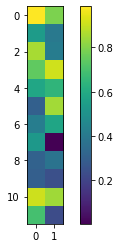

In [24]:
basic_visualization(map1.map)